In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Monte-Carlo Method

In [20]:
def MCsim(S, T, r, vol, N):
    dt = T / N
    St = np.zeros(N+1)
    St[0] = S
    for i in range(N):
        St[i+1] = St[i] * math.exp((r-0.5*vol*vol)*dt+vol*np.random.normal()*math.sqrt(dt))
    return St

def MCcall(S, T, r, vol, K, N, M):
    c = 0
    S_all = np.zeros((M, N+1))
    for m in range(M):
        Sa = MCsim(S, T, r, vol, N)
        S_all[m][:] = Sa
        if Sa[-1] > K:
            c += (Sa[-1] - K)
    plt.plot(S_all.T) # Transpose
    return c/M * math.exp(-r*T)


In [ ]:
S = 50
K = 40
r = 0.08
T = 2
vol = 0.2
N = 100
M = 10000

16.34327157811249


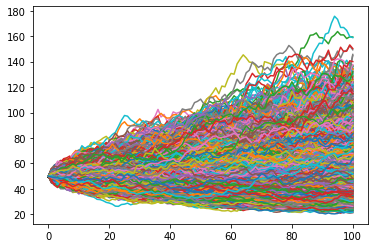

In [21]:
call = MCcall(S, T, r, vol, K, N, M)
print(call)
Sa = MCsim(S, T, r, vol, 100)
plt.plot(Sa)


# Binomial Tree

In [33]:
S = 50
K = 40
r = 0.08
T = 2
vol = 0.2
N = 1000
M = 10000

In [34]:
def biTcll(S, T, r, K, vol, N):
    dt = T / N
    u = math.exp(vol * math.sqrt(dt))
    d = math.exp(-vol * math.sqrt(dt))
    p = (math.exp(r*dt) - d) / (u - d)
    Price = np.zeros((N+1, N+1))
    # Price Simulation Table
    Price[0][0] = S
    for c in range(1, N+1):
        for R in range(c+1):
            if R == 0:
                Price[R][c] = Price[R][c-1] * u
            else:
                Price[R][c] = Price[R-1][c-1] * d
    # Prob Table
    P = np.zeros((N+1, N+1))
    P[0][0] = 1
    for c in range(1, N+1):
        for R in range(c+1):
            if R == 0:
                P[R][c] = P[R][c-1] * p
            else:
                P[R][c] = P[R][c-1] * p + P[R-1][c-1] * (1-p)
    c = 0
    for R in range(N+1):
        if Price[R][N] > K:
            c += (Price[R][N] - K) * P[R][N]
    return c * math.exp(-r*T)

In [35]:
print(biTcll(S, T, r, K, vol, N))

16.384089589872556
